# Model Analysis
This is an analysis of different types of **Classfication models** performed on Walmart Trip Type classfication problem.

Since the number of triptypes were 38, it has been reduced to 5 triptypes which has almost equal bins.

This analysis is as follows. 
1. Feature Engineering.
2. Test Train Split
3. K Nearest Neighbours Classifier
4. Logistic Regression Classifier
5. Naive Bayes Classifier
6. Decision Tree Classifier
7. SVM Classifier
8. Random Forest Classifier
9. LDA Classifier

Each of the above classifier will have reported 
- classification accuracy
- confusion matrix
- classification report


In [1]:
#import statements
import pandas as pd
import numpy as np
import re 

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.lda import LDA
from matplotlib import pyplot as plt
%matplotlib inline


#importing the data into the notebook
train_data = pd.read_csv("../data/fiveclasses_train.csv")
train_data.head()



C:\Users\Gokulraj\Anaconda3\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,37,108546,1,4.082000e+03,-1,PRODUCE,4020
1,38,154356,1,3.800000e+09,1,GROCERY DRY GOODS,3555
2,36,80296,3,8.410580e+10,1,PERSONAL CARE,1410
3,37,168408,4,6.701522e+10,1,GROCERY DRY GOODS,2652
4,3,96861,6,6.811316e+10,1,FINANCIAL SERVICES,275


## 1. Feature Engineering

In [2]:
features = ["Weekday", "NumItems", "Return", 'ACCESSORIES',
       'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
       'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
       'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
       'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
       'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
       'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
       'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING',  'MENSWEAR',
       'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
       'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
       'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
       'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
       'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
       'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
       'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']
#Feature Building
def transform_my_data(data):
    
    dummies = pd.get_dummies(data.DepartmentDescription)
    data[dummies.columns] = dummies 
    data_dummies = data.iloc[:,7:]
    data_dummies = data_dummies.apply(lambda x: x*data["ScanCount"])
    data_dummies = data_dummies.replace(-0,0)

    data.loc[data.ScanCount < 0, 'Return'] = 1
    data.loc[data.Return != 1, 'Return'] = 0
    data = data[["TripType", "VisitNumber", "Weekday", "ScanCount", "Return"]]
    data = data.rename(columns={"ScanCount":"NumItems"})
    data = pd.concat([data, data_dummies], axis=1)
    grouped = data.groupby("VisitNumber")
    grouped = grouped.agg({'Weekday': np.max, "TripType": np.max, 'NumItems': np.sum, 'Return': np.max, 
              '1-HR PHOTO': np.sum, 'ACCESSORIES': np.sum,
       'AUTOMOTIVE': np.sum, 'BAKERY': np.sum, 'BATH AND SHOWER': np.sum, 'BEAUTY': np.sum, 'BEDDING': np.sum,
       'BOOKS AND MAGAZINES': np.sum, 'BOYS WEAR': np.sum, 'BRAS & SHAPEWEAR': np.sum,
       'CAMERAS AND SUPPLIES': np.sum, 'CANDY, TOBACCO, COOKIES': np.sum, 'CELEBRATION': np.sum,
       'COMM BREAD': np.sum, 'CONCEPT STORES': np.sum, 'COOK AND DINE': np.sum, 'DAIRY': np.sum, 'DSD GROCERY': np.sum,
       'ELECTRONICS': np.sum, 'FABRICS AND CRAFTS': np.sum, 'FINANCIAL SERVICES': np.sum,
       'FROZEN FOODS': np.sum, 'FURNITURE': np.sum, 'GIRLS WEAR, 4-6X  AND 7-14': np.sum,
       'GROCERY DRY GOODS': np.sum, 'HARDWARE': np.sum, 'HEALTH AND BEAUTY AIDS': np.sum, 'HOME DECOR': np.sum,
       'HOME MANAGEMENT': np.sum, 'HORTICULTURE AND ACCESS': np.sum,
       'HOUSEHOLD CHEMICALS/SUPP': np.sum, 'HOUSEHOLD PAPER GOODS': np.sum,
       'IMPULSE MERCHANDISE': np.sum, 'INFANT APPAREL': np.sum, 'INFANT CONSUMABLE HARDLINES': np.sum,
       'JEWELRY AND SUNGLASSES': np.sum, 'LADIES SOCKS': np.sum, 'LADIESWEAR': np.sum,
       'LARGE HOUSEHOLD GOODS': np.sum, 'LAWN AND GARDEN': np.sum, 'LIQUOR,WINE,BEER': np.sum,
       'MEAT - FRESH & FROZEN': np.sum, 'MEDIA AND GAMING': np.sum,'MENSWEAR': np.sum,
       'OFFICE SUPPLIES': np.sum, 'OPTICAL - FRAMES': np.sum, 'OPTICAL - LENSES': np.sum,
       'OTHER DEPARTMENTS': np.sum, 'PAINT AND ACCESSORIES': np.sum, 'PERSONAL CARE': np.sum,
       'PETS AND SUPPLIES': np.sum, 'PHARMACY OTC': np.sum, 'PHARMACY RX': np.sum,
       'PLAYERS AND ELECTRONICS': np.sum, 'PLUS AND MATERNITY': np.sum, 'PRE PACKED DELI': np.sum,
       'PRODUCE': np.sum, 'SEAFOOD': np.sum, 'SEASONAL': np.sum, 'SERVICE DELI': np.sum, 'SHEER HOSIERY': np.sum,
       'SHOES': np.sum, 'SLEEPWEAR/FOUNDATIONS': np.sum, 'SPORTING GOODS': np.sum,
       'SWIMWEAR/OUTERWEAR': np.sum, 'TOYS': np.sum, 'WIRELESS': np.sum})
    data = grouped[["TripType", "Weekday", "NumItems", "Return",'1-HR PHOTO', 'ACCESSORIES',
           'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
           'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
           'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
           'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
           'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
           'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
           'GROCERY DRY GOODS', 'HARDWARE', 'HEALTH AND BEAUTY AIDS', 'HOME DECOR',
           'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
           'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
           'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
           'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
           'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
           'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENSWEAR',
           'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
           'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
           'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
           'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
           'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
           'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
           'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']]
    
    
    #data.head()
    return data

train_data=transform_my_data(train_data)
train_data.shape
#train_data.head()

(15195, 71)

## 2. Test and Train Split

In [3]:
#Data preprocesssing dropping na and splitting data into test and train
train, test = train_test_split(train_data, test_size = 0.3)
test=test.dropna()
train=train.dropna()
train_data = train
train_data.describe()
train_data.shape

(10636, 71)

In [4]:
#Data preprocesssing
#Transforming qualitative variables into quantitative
def transform(day,no):
    global train_data
    train_data=train_data.replace(day,no)
    return;
transform("Monday", 1)
transform("Tuesday", 2)
transform("Wednesday", 3)
transform("Thursday", 4)
transform("Friday", 5)
transform("Saturday", 6)
transform("Sunday", 7)

#Removing redundency in department description column
train_data=train_data.replace("MENS WEAR","MENSWEAR")

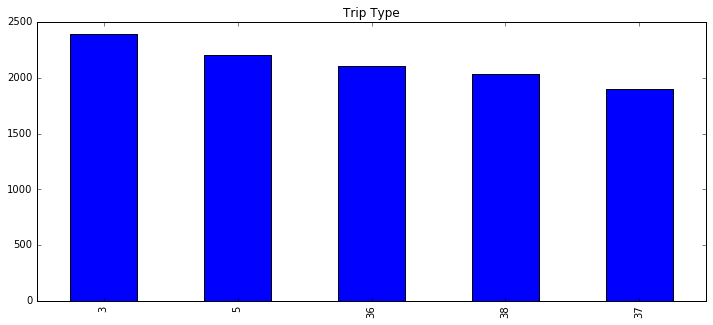

In [5]:

#ploting the histogram for the trip type 
#data_tripty = train_data.drop_duplicates("VisitNumber")
plt.figure(figsize=(12,5))
train_data['TripType'].value_counts().plot('bar',title="Trip Type")

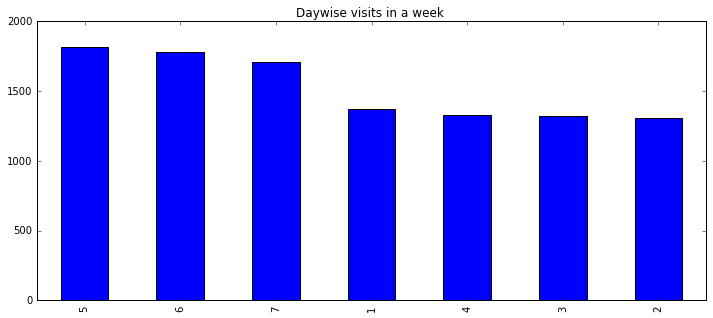

In [6]:
#ploting histogram for daywise visits
#data_tripwd = train_data.drop_duplicates("VisitNumber")
plt.figure(figsize=(12,5))
train_data['Weekday'].value_counts().plot('bar',title="Daywise visits in a week ")

In [7]:
train_data.T.apply(lambda x: x.nunique(),axis=1)

TripType                       5
Weekday                        7
NumItems                      64
Return                         2
1-HR PHOTO                     5
ACCESSORIES                    5
AUTOMOTIVE                     5
BAKERY                         7
BATH AND SHOWER                7
BEAUTY                        19
BEDDING                        3
BOOKS AND MAGAZINES            5
BOYS WEAR                      6
BRAS & SHAPEWEAR               5
CAMERAS AND SUPPLIES           2
CANDY, TOBACCO, COOKIES       10
CELEBRATION                    9
COMM BREAD                    15
CONCEPT STORES                 2
COOK AND DINE                  9
DAIRY                         25
DSD GROCERY                   18
ELECTRONICS                    4
FABRICS AND CRAFTS             8
FINANCIAL SERVICES            14
FROZEN FOODS                  16
FURNITURE                      4
GIRLS WEAR, 4-6X  AND 7-14     7
GROCERY DRY GOODS             32
HARDWARE                       6
          

In [8]:
#train_data_dup = train_data.drop_duplicates("VisitNumber")
def get_count(values):
    return len(values)
grouped_count = train_data.groupby(['Weekday',"TripType"]).TripType.agg(get_count)
grouped_count

Weekday  TripType
1        3           289
         5           277
         36          253
         37          263
         38          291
2        3           301
         5           286
         36          242
         37          205
         38          272
3        3           301
         5           311
         36          251
         37          202
         38          256
4        3           292
         5           307
         36          270
         37          211
         38          246
5        3           517
         5           356
         36          356
         37          298
         38          292
6        3           404
         5           364
         36          386
         37          334
         38          293
7        3           290
         5           300
         36          347
         37          390
         38          383
Name: TripType, dtype: int64

# Classification Models

## KNN

In [9]:
#KNN classifier

knc = KNeighborsClassifier(n_neighbors=5)
knc = knc.fit(np.asarray(train_data[features]), 
                    np.asarray(train_data.TripType))

predictions = knc.predict(np.asarray(test[features]))

In [10]:
# prediction1 = gnb.predict(np.asarray(train_data[features]))

### Accuracy KNN

In [11]:
#Accuracy of KNN

accuracy_score(test.TripType,predictions )

0.86444395700811583

In [12]:
# Accuracy Training 
# accuracy_score(train_data.TripType,predictions1 )

### Confusion Matrix KNN

In [13]:
# Confusion Matrix
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3,5,36,37,38,All
True,,,,,,
3,970,12,7,2,3,994
5,27,787,64,24,30,932
36,18,94,739,15,19,885
37,4,17,21,729,106,877
38,7,36,32,80,716,871
All,1026,946,863,850,874,4559


### Classification Report KNN

In [14]:
#pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(test["TripType"], predictions))

             precision    recall  f1-score   support

          3       0.95      0.98      0.96       994
          5       0.83      0.84      0.84       932
         36       0.86      0.84      0.85       885
         37       0.86      0.83      0.84       877
         38       0.82      0.82      0.82       871

avg / total       0.86      0.86      0.86      4559



# Logistic Regression

In [15]:
#Logistic Regression

train_data.TripType = train_data.TripType.astype(float)
train_data.Weekday = train_data.Weekday.astype(float)  
                         
test.TripType = test.TripType.astype(float)
test.Weekday = test.Weekday.astype(float)  


In [16]:
lr = LogisticRegression()
lr.fit(X = np.asarray(train_data[features]), y = np.asarray(train_data.TripType))



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
predictions = lr.predict(np.asarray(test[features]))

In [18]:
# prediction1 = gnb.predict(np.asarray(train_data[features]))

### Confusion Matrix logistic regression

In [19]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3.0,5.0,36.0,37.0,38.0,All
True,,,,,,
3.0,972,16,5,0,1,994
5.0,22,812,56,19,23,932
36.0,12,64,779,11,19,885
37.0,2,14,17,761,83,877
38.0,2,24,22,64,759,871
All,1010,930,879,855,885,4559


### Accuracy logistic Regression

In [20]:
#Accuracy of logistic regression
accuracy_score(test.TripType,predictions )

0.89559113840754556

In [21]:
#Accuracy training = 0. 947652

### Classification Report Logistic Regression

In [22]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(test["TripType"], predictions))

             precision    recall  f1-score   support

        3.0       0.96      0.98      0.97       994
        5.0       0.87      0.87      0.87       932
       36.0       0.89      0.88      0.88       885
       37.0       0.89      0.87      0.88       877
       38.0       0.86      0.87      0.86       871

avg / total       0.90      0.90      0.90      4559



# Naive Bayes


In [23]:
gnb = GaussianNB()

gnb = gnb.fit(np.asarray(train_data[features]), 
                    np.asarray(train_data.TripType))
prediction = gnb.predict(np.asarray(test[features]))



In [24]:
prediction1 = gnb.predict(np.asarray(train_data[features]))

### Accuracy NB

In [25]:
#Accuracy of naive Bayes
accuracy_score(test.TripType,prediction )

0.58587409519631495

In [26]:
# Training Accuracy
accuracy_score(train_data.TripType,prediction1 )

0.59270402406919898

### Confusion Matrix NB

In [27]:
pd.crosstab(test.TripType,prediction , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3.0,5.0,36.0,37.0,38.0,All
True,,,,,,
3.0,942,10,14,6,22,994
5.0,319,483,60,20,50,932
36.0,49,414,326,26,70,885
37.0,2,152,17,308,398,877
38.0,7,173,20,59,612,871
All,1319,1232,437,419,1152,4559


### Classification Report NB

In [28]:
print(classification_report(test["TripType"], predictions))

             precision    recall  f1-score   support

        3.0       0.96      0.98      0.97       994
        5.0       0.87      0.87      0.87       932
       36.0       0.89      0.88      0.88       885
       37.0       0.89      0.87      0.88       877
       38.0       0.86      0.87      0.86       871

avg / total       0.90      0.90      0.90      4559



# Decision Tree

In [29]:
# Decision Tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(np.asarray(train_data[features]), 
                    np.asarray(train_data.TripType))
predictions = clf.predict(np.asarray(test[features]))

In [30]:
predictions1 = clf.predict(np.asarray(train_data[features]))

### Accuracy of Decision Tree

In [31]:
#Accuracy of Decision Tree
accuracy_score(test.TripType,predictions )

0.85040579074358413

In [32]:
# Train Accuracy
accuracy_score(train_data.TripType,predictions1 )

0.98364046634072955

### Confusion Matrix Decision Tree

In [33]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,3.0,5.0,36.0,37.0,38.0,All
True,,,,,,
3.0,974,12,6,1,1,994
5.0,24,773,88,18,29,932
36.0,9,92,734,19,31,885
37.0,2,29,28,709,109,877
38.0,10,28,39,107,687,871
All,1019,934,895,854,857,4559


### Classification report Desicion Tree

In [34]:
print(classification_report(test["TripType"], predictions))

             precision    recall  f1-score   support

        3.0       0.96      0.98      0.97       994
        5.0       0.83      0.83      0.83       932
       36.0       0.82      0.83      0.82       885
       37.0       0.83      0.81      0.82       877
       38.0       0.80      0.79      0.80       871

avg / total       0.85      0.85      0.85      4559



# Support Vector Machine

In [35]:
#SVM

clf = svm.SVC(decision_function_shape='ovr')
clf = clf.fit(np.asarray(train_data[features]), 
                    np.asarray(train_data.TripType))

In [36]:
predictions = clf.predict(np.asarray(test[features]))

In [37]:
predictions1 = clf.predict(np.asarray(train_data[features]))

### Accuracy of SVM

In [38]:
#Accuracy of SVM
accuracy_score(test.TripType,predictions )

0.89230094318929587

In [39]:
# Training Accuracy
accuracy_score(train_data.TripType,predictions1 )

0.90221887927792399

### Confusion Matrix SVM

In [40]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3.0,5.0,36.0,37.0,38.0,All
True,,,,,,
3.0,964,20,6,2,2,994
5.0,12,825,49,21,25,932
36.0,6,67,768,22,22,885
37.0,2,18,13,754,90,877
38.0,2,28,22,62,757,871
All,986,958,858,861,896,4559


### Classification Report SVM

In [41]:
print(classification_report(test["TripType"], predictions))

             precision    recall  f1-score   support

        3.0       0.98      0.97      0.97       994
        5.0       0.86      0.89      0.87       932
       36.0       0.90      0.87      0.88       885
       37.0       0.88      0.86      0.87       877
       38.0       0.84      0.87      0.86       871

avg / total       0.89      0.89      0.89      4559



# Random Forest

In [42]:
#Random Forest

walmart_rf = RandomForestClassifier(n_estimators=100)
walmart_rf = walmart_rf.fit(np.asarray(train_data[features]), np.asarray(train_data.TripType))
predictions = walmart_rf.predict(np.asarray(test[features]))


In [43]:
predictions1 = clf.predict(np.asarray(train_data[features]))

### Accuracy Random Forest

In [44]:
#Accuracy of Random Forest
accuracy_score(test.TripType,predictions )


0.88703663084009654

In [45]:
# Training Accuracy
accuracy_score(train_data.TripType,predictions1 )

0.90221887927792399

### Confusion Matrix Random Forest

In [46]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,3.0,5.0,36.0,37.0,38.0,All
True,,,,,,
3.0,974,13,5,1,1,994
5.0,20,793,77,15,27,932
36.0,6,78,767,14,20,885
37.0,1,15,17,781,63,877
38.0,6,32,24,80,729,871
All,1007,931,890,891,840,4559


### Classification report Random Forest

In [47]:
print(classification_report(test["TripType"], predictions))

             precision    recall  f1-score   support

        3.0       0.97      0.98      0.97       994
        5.0       0.85      0.85      0.85       932
       36.0       0.86      0.87      0.86       885
       37.0       0.88      0.89      0.88       877
       38.0       0.87      0.84      0.85       871

avg / total       0.89      0.89      0.89      4559



# Linear Discriminent Analysis

In [48]:
#LDA

clf = LDA()
clf = clf.fit(np.asarray(train_data[features]), np.asarray(train_data.TripType))
predictions = clf.predict(np.asarray(test[features]))

C:\Users\Gokulraj\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [49]:
predictions1 = clf.predict(np.asarray(train_data[features]))

### Accuracy LDA

In [50]:
# Accuracy of LDA
accuracy_score(test.TripType,predictions )

0.86400526431234925

In [51]:
# Accuracy Training
accuracy_score(train_data.TripType,predictions1 )

0.86733734486649117

### Confusion Matrix LDA

In [52]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,3.0,5.0,36.0,37.0,38.0,All
True,,,,,,
3.0,904,88,1,0,1,994
5.0,3,855,48,7,19,932
36.0,15,94,740,10,26,885
37.0,9,54,18,678,118,877
38.0,8,48,19,34,762,871
All,939,1139,826,729,926,4559


### Classification Report

In [53]:
print(classification_report(test["TripType"], predictions))

             precision    recall  f1-score   support

        3.0       0.96      0.91      0.94       994
        5.0       0.75      0.92      0.83       932
       36.0       0.90      0.84      0.86       885
       37.0       0.93      0.77      0.84       877
       38.0       0.82      0.87      0.85       871

avg / total       0.87      0.86      0.87      4559



## L1 Logistic Regression

In [54]:
train_data.to_csv("featureData.csv", sep=',')

In [55]:
clf = LogisticRegression(C= 0.1, penalty='l1')

In [56]:
clf = clf.fit(np.asarray(train_data[features]), np.asarray(train_data.TripType))
predictions = clf.predict(np.asarray(test[features]))
predictions1 = clf.predict(np.asarray(train_data[features]))

In [57]:
accuracy_score(train_data.TripType,predictions1 ), accuracy_score(test.TripType,predictions )

(0.89892816848439261, 0.89559113840754556)

### Grid search CV to select best params

In [60]:
from sklearn.linear_model import LogisticRegressionCV

In [66]:
cvalues = [float(x) for x in range(1 , 100, 1)]
print(cvalues)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0]


In [70]:
lrCV = LogisticRegressionCV(Cs=cvalues, penalty='l1', solver = 'liblinear')

In [71]:
lrCV = lrCV.fit(np.asarray(train_data[features]), np.asarray(train_data.TripType))
predictions = lrCV.predict(np.asarray(test[features]))
predictions1 = lrCV.predict(np.asarray(train_data[features]))

In [72]:
accuracy_score(train_data.TripType,predictions1 ), accuracy_score(test.TripType,predictions )

(0.90146671681083113, 0.89537179205966222)

In [84]:
lrCV.coef_

array([[ -6.30717705e-02,  -1.56012509e+00,  -8.00863384e-01,
          5.12118298e-01,   5.42720999e-01,  -1.05847138e+00,
          0.00000000e+00,  -8.27082668e-01,   0.00000000e+00,
          2.08469560e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -4.58934287e-01,   0.00000000e+00,   0.00000000e+00,
         -9.90516844e-01,  -3.83002230e-01,   1.27007910e-01,
          0.00000000e+00,   6.60966574e+00,  -8.17129053e-01,
          0.00000000e+00,   0.00000000e+00,  -1.44960437e+00,
          0.00000000e+00,   0.00000000e+00,   1.25851364e+00,
          0.00000000e+00,  -1.05700075e+00,  -4.99337758e-01,
          1.59131237e+00,   0.00000000e+00,   9.98783070e-01,
          0.00000000e+00,   0.00000000e+00,   1.19806250e-01,
          4.31773364e+00,   8.72668371e-02,   7.54838182e-01,
          0.00000000e+00,   0.00000000e+00,   1.77133534e-01,
          0.00000000e+00,  -3.09714708e+00,  -2.32549141e+00,
        

### Best Lambda for each classes

In [87]:
lrCV.C_

array([  1.,   1.,  74.,  15.,   1.])